In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/COVID-19_Radiography_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1017.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1006.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-110.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-114.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-113.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-112.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1013.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1022.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1021.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1046.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-1024.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-108.png
/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-118.png
/content/drive/MyDrive/COVID-19

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.preprocessing import image

In [ ]:
#processing the data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/COVID-19_Radiography_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/COVID-19_Radiography_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 3150 files belonging to 3 classes.
Using 2520 files for training.
Found 3150 files belonging to 3 classes.
Using 630 files for validation.


In [ ]:
#classes 
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


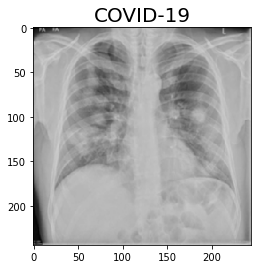

In [ ]:
#visualize data
image_path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/COVID-634.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
plt.title("COVID-19", fontsize=20)
plt.imshow(new_img)

In [ ]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  
  layers.Conv2D(8, 3, activation='relu'),

  layers.Dropout(0.3),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, activation='relu'),

  layers.Dropout(0.3),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),

  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience = 5)
model.compile(optimizer = 'RMSprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_data, validation_data = test_data,batch_size = 32, epochs = 10, callbacks=[early])

Epoch 1/10
79/79 [==============================] - 408s 5s/step - loss: 0.8440 - accuracy: 0.7940 - val_loss: 0.4894 - val_accuracy: 0.7778
Epoch 2/10
79/79 [==============================] - 168s 2s/step - loss: 0.2415 - accuracy: 0.9206 - val_loss: 0.2908 - val_accuracy: 0.9063
Epoch 3/10
79/79 [==============================] - 166s 2s/step - loss: 0.1684 - accuracy: 0.9444 - val_loss: 0.2975 - val_accuracy: 0.9111
Epoch 4/10
79/79 [==============================] - 162s 2s/step - loss: 0.0786 - accuracy: 0.9738 - val_loss: 0.2683 - val_accuracy: 0.9143
Epoch 5/10
79/79 [==============================] - 165s 2s/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.2601 - val_accuracy: 0.9270
Epoch 6/10
79/79 [==============================] - 164s 2s/step - loss: 0.0342 - accuracy: 0.9909 - val_loss: 0.2820 - val_accuracy: 0.9270
Epoch 7/10
79/79 [==============================] - 162s 2s/step - loss: 0.0364 - accuracy: 0.9905 - val_loss: 0.2601 - val_accuracy: 0.9333
Epoch 8/10
79

In [ ]:
model.evaluate(test_data)

20/20 [==============================] - 12s 520ms/step - loss: 0.2936 - accuracy: 0.9206


[0.2936289310455322, 0.920634925365448]

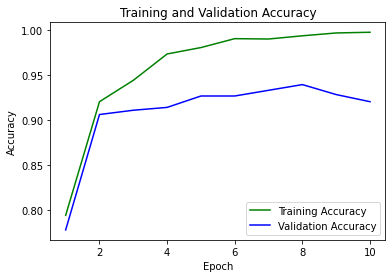

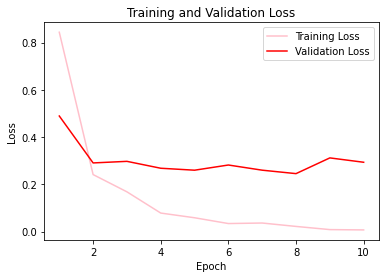

In [ ]:
#plotting training values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 [==============================] - 0s 34ms/step
[[4.2903084e-06 9.9126071e-01 8.7350821e-03]]
[1]
NORMAL


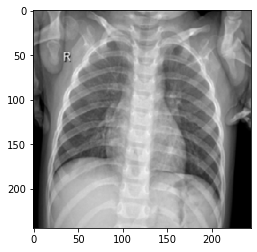

In [ ]:
#example 1
image_path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/Normal-120.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [ ]:
from tensorflow.keras.models import Model

base_model = model
activation_model = Model(inputs=base_model.inputs, outputs=base_model.layers[1].output)

InvalidArgumentError: ignored

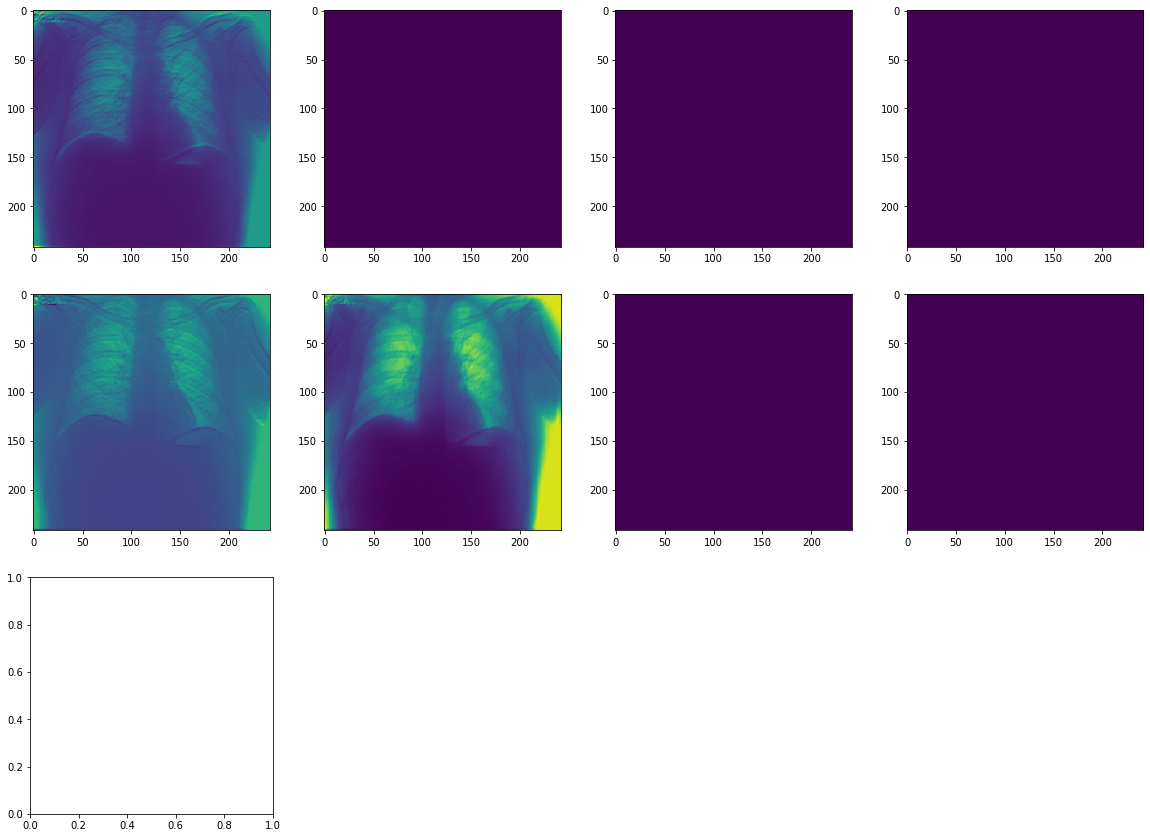

In [ ]:
img_path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/COVID-910.png'
img = image.load_img(img_path, target_size=(244, 244))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation = activation_model(img_tensor)

plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i])
plt.show()